In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import seaborn as sns
import pyreadr
import psutil
import sys
import anndata as ad
from multianndata import MultiAnnData as mad
import shap
import xgboost
import cna
import gc

import scanpy as sc
import scipy
from sklearn.decomposition import NMF, PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler

/projects/jyoung1@xsede.org/software/anaconda/envs/xcell_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
tnbc_data_path = "/projects/jyoung1@xsede.org/Research/xcell/data/revisions/tnbc/"

expression_data = pd.read_csv(f"{tnbc_data_path}expression_data_TNBC_post.csv", index_col=0)
meta_data = pd.read_csv(f"{tnbc_data_path}meta_TNBC_post.csv", index_col=0)

meta_data.set_index(expression_data.index, inplace=True)

## cna

In [11]:
expression_data.head()

,BIOKEY_10_On_AAACCTGTCAACACCA-1,BIOKEY_10_On_AAACCTGTCTGAGGGA-1,BIOKEY_10_On_AAACGGGGTCTGCAAT-1,BIOKEY_10_On_AAACGGGTCCTCAATT-1,BIOKEY_10_On_AAACGGGTCTCTTATG-1,BIOKEY_10_On_AAAGATGTCTCAAGTG-1,BIOKEY_10_On_AAAGCAAGTAAGCACG-1,BIOKEY_10_On_AAAGTAGGTCGCCATG-1,BIOKEY_10_On_AAAGTAGTCGTATCAG-1,BIOKEY_10_On_AAATGCCGTCGGCATC-1,...,BIOKEY_39_On_TTCTCAACACGAGAGT-1,BIOKEY_39_On_TTGAACGTCCAGTATG-1,BIOKEY_39_On_TTGGAACCATACCATG-1,BIOKEY_39_On_TTGTAGGTCGCAGGCT-1,BIOKEY_39_On_TTTATGCGTATCACCA-1,BIOKEY_39_On_TTTGGTTCAATAAGCA-1,BIOKEY_39_On_TTTGGTTCATGCCTTC-1,BIOKEY_39_On_TTTGGTTTCAGTTTGG-1,BIOKEY_39_On_TTTGTCAGTCAGAATA-1,BIOKEY_39_On_TTTGTCAGTCTCTTAT-1
HBB,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
CXCL13,0.0,3.215809,0.0,0.0,0.0,0.0,0.263969,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.829675,0.0,0.0,0.0,0.0,0.0,2.865412
SCGB1D2,0.0,0.000000,0.0,0.0,0.0,0.0,0.472610,0.0,2.43365,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
REG1A,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
S100A7,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [12]:
meta_data.head()

,orig.ident,nCount_RNA,nFeature_RNA,cell_id,sample_id,timepoint,outcome,Cancer_type,cellType,cohort,...,sample_id_pre_post,treatment_info,total_cell_per_patient,cell_type_for_count,total_T_Cell,normalized_CD8_totalcells,RNA_snn_res.0.8,seurat_clusters,Cancer_type_pre_post,Primary_or_met
BIOKEY_10_On_AAACCTGTCAACACCA-1,BIOKEY,4188,1446,BIOKEY_10_On_AAACCTGTCAACACCA-1,BIOKEY_10,On,E,TNBC,Cancer_cell,treatment_naive,...,BIOKEY_10_Post,Post_treatment_naive,10796,T_cell,5089,0.471378,7,7,TNBC_Post,Primary
BIOKEY_10_On_AAACCTGTCTGAGGGA-1,BIOKEY,418,286,BIOKEY_10_On_AAACCTGTCTGAGGGA-1,BIOKEY_10,On,E,TNBC,Cancer_cell,treatment_naive,...,BIOKEY_10_Post,Post_treatment_naive,10796,T_cell,5089,0.471378,7,7,TNBC_Post,Primary
BIOKEY_10_On_AAACGGGGTCTGCAAT-1,BIOKEY,1405,847,BIOKEY_10_On_AAACGGGGTCTGCAAT-1,BIOKEY_10,On,E,TNBC,Cancer_cell,treatment_naive,...,BIOKEY_10_Post,Post_treatment_naive,10796,T_cell,5089,0.471378,17,17,TNBC_Post,Primary
BIOKEY_10_On_AAACGGGTCCTCAATT-1,BIOKEY,463,352,BIOKEY_10_On_AAACGGGTCCTCAATT-1,BIOKEY_10,On,E,TNBC,Cancer_cell,treatment_naive,...,BIOKEY_10_Post,Post_treatment_naive,10796,T_cell,5089,0.471378,23,23,TNBC_Post,Primary
BIOKEY_10_On_AAACGGGTCTCTTATG-1,BIOKEY,807,274,BIOKEY_10_On_AAACGGGTCTCTTATG-1,BIOKEY_10,On,E,TNBC,Cancer_cell,treatment_naive,...,BIOKEY_10_Post,Post_treatment_naive,10796,T_cell,5089,0.471378,7,7,TNBC_Post,Primary


In [13]:
expression_data = expression_data.T
expression_data.head()

,HBB,CXCL13,SCGB1D2,REG1A,S100A7,IGHV3-23,CRISP3,PPDPFL,PLA2G2A,COL1A1,...,PREX1,ASCL4,ADH1C,TUBB4A,RAD51AP1,SLC6A4,PCMTD1,PEG3,GADD45B,LMTK3
BIOKEY_10_On_AAACCTGTCAACACCA-1,0.0,0.000000,0.0,0.0,0.0,1.220173,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.220173,0.0,0.0,1.753633
BIOKEY_10_On_AAACCTGTCTGAGGGA-1,0.0,3.215809,0.0,0.0,0.0,4.792622,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
BIOKEY_10_On_AAACGGGGTCTGCAAT-1,0.0,0.000000,0.0,0.0,0.0,2.094015,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
BIOKEY_10_On_AAACGGGTCCTCAATT-1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
BIOKEY_10_On_AAACGGGTCTCTTATG-1,0.0,0.000000,0.0,0.0,0.0,8.108305,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000


In [14]:
label_encoder = LabelEncoder()
nam_meta = meta_data.copy()
nam_meta['outcome'] = label_encoder.fit_transform(meta_data['outcome'])
nam_meta['sample_id'] = label_encoder.fit_transform(meta_data['sample_id'])
#nam_meta['age'] = label_encoder.fit_transform(meta_data['age'])

In [15]:
nam_meta.set_index(expression_data.index, inplace=True)

In [16]:
# create MultiAnnData object
multiannadata_obj = mad(X=expression_data, obs=nam_meta, sampleid="cell_id")
print("**created the MultiAnnData object")
print('multiannadata_obj.samplem has', len(multiannadata_obj.samplem.columns), 'columns')

# Since our metadata are stored per-cell, we need to copy the information that is actually per-sample
# (case status, batch and covariates) to the per-sample metadata DataFrame `d.samplem`
multiannadata_obj.obs_to_sample(['sample_id'])
print('now multiannadata_obj.samplem has', len(multiannadata_obj.samplem.columns), 'columns')

sc.pp.neighbors(multiannadata_obj, use_rep="X")
print("**computed the cell-cell similarity graph**")
# compute UMAP coordinates for plotting
sc.tl.umap(multiannadata_obj)
print("**computed the UMAP coordinates for plotting**")

['orig.ident' 'cell_id' 'timepoint' 'Cancer_type' 'cellType' 'cohort'
 'enough_cells' 'pre_post' 'Study_name' 'sample_id_pre_post'
 'treatment_info' 'cell_type_for_count' 'Cancer_type_pre_post'
 'Primary_or_met']
consider casting to numeric types where appropriate, and
consider re-coding text-valued columns with pandas.get_dummies
**created the MultiAnnData object
multiannadata_obj.samplem has 0 columns
now multiannadata_obj.samplem has 1 columns


/projects/jyoung1@xsede.org/software/anaconda/envs/xcell_env/lib/python3.11/site-packages/multianndata/core.py:78: FutureWarning: The provided callable <function mean at 0x14eb616aeb60> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  self.obs[[self.sampleid, c]].groupby(by=self.sampleid).aggregate(aggregate)


**computed the cell-cell similarity graph**
**computed the UMAP coordinates for plotting**


In [ ]:
res = cna.tl.association(multiannadata_obj, multiannadata_obj.obs.outcome, show_progress=True)
print("DONE!")

qcd NAM not found; computing and saving
	median kurtosis: 9631.351939661263
	20th percentile R2(t,t-1): nan
	median kurtosis: 4778.506065069207
	20th percentile R2(t,t-1): 0.7631195783615112
	median kurtosis: 1333.8384257469893
	20th percentile R2(t,t-1): 0.6244097352027893
	median kurtosis: 200.4487572468457
	20th percentile R2(t,t-1): 0.9356518983840942
	median kurtosis: 84.13384373876812
	20th percentile R2(t,t-1): 0.9381749629974365
	median kurtosis: 43.729027077207576
	20th percentile R2(t,t-1): 0.9814973473548889
	median kurtosis: 29.172524514983323
	20th percentile R2(t,t-1): 0.9840953946113586
	median kurtosis: 22.346066653646773
	20th percentile R2(t,t-1): 0.9921668767929077
	median kurtosis: 19.21205617438249
	20th percentile R2(t,t-1): 0.9931555390357971
	median kurtosis: 16.257067773601637
	20th percentile R2(t,t-1): 0.9956130385398865
stopping after 10 steps
covariate-adjusted NAM not found; computing and saving
computing SVD


In [ ]:
TNBC_post_NAM = multiannadata_obj.uns["NAM_sampleXpc"]
TNBC_post_NAM = pd.DataFrame(TNBC_post_NAM)

## harmony

In [9]:
import harmonypy as hm

In [ ]:
TNBC_post_NAM_pcs = TNBC_post_NAM.iloc[:, :10]

TNBC_post_NAM_pcs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
cell_id,,,,,,,,,,
BIOKEY_10_On_AAACCTGTCAACACCA-1,-0.008958,0.010369,0.000529,-0.004215,0.002537,-0.000880,0.002533,-0.000557,0.001233,-0.000013
BIOKEY_10_On_AAACCTGTCTGAGGGA-1,-0.006188,0.004892,0.005723,0.003446,0.004816,-0.005935,-0.012624,0.012678,0.000761,0.002152
BIOKEY_10_On_AAACGGGGTCTGCAAT-1,-0.005667,-0.000371,0.008437,0.006188,0.007924,-0.010318,-0.020631,0.024721,-0.012045,0.001098
BIOKEY_10_On_AAACGGGTCCTCAATT-1,-0.006796,0.000747,0.002828,-0.002353,0.000562,-0.000676,0.006317,-0.003326,-0.009193,-0.001526
BIOKEY_10_On_AAACGGGTCTCTTATG-1,-0.003844,-0.002027,0.007694,0.004987,0.005800,-0.006886,-0.011027,0.014478,-0.001942,0.006762


In [23]:
hm_res = hm.run_harmony(TNBC_post_NAM_pcs, meta_data, ["sample_id"])

2025-06-28 12:22:08,754 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-06-28 12:22:09,966 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-06-28 12:22:10,033 - harmonypy - INFO - Iteration 1 of 10
2025-06-28 12:22:11,987 - harmonypy - INFO - Iteration 2 of 10
2025-06-28 12:22:13,946 - harmonypy - INFO - Iteration 3 of 10
2025-06-28 12:22:15,902 - harmonypy - INFO - Iteration 4 of 10
2025-06-28 12:22:17,855 - harmonypy - INFO - Iteration 5 of 10
2025-06-28 12:22:19,818 - harmonypy - INFO - Iteration 6 of 10
2025-06-28 12:22:21,774 - harmonypy - INFO - Iteration 7 of 10
2025-06-28 12:22:23,730 - harmonypy - INFO - Iteration 8 of 10
2025-06-28 12:22:25,693 - harmonypy - INFO - Iteration 9 of 10
2025-06-28 12:22:27,653 - harmonypy - INFO - Iteration 10 of 10
2025-06-28 12:22:29,618 - harmonypy - INFO - Stopped before convergence


In [26]:
# Write the adjusted PCs to a new file.
harmonized_PCs = pd.DataFrame(hm_res.Z_corr).T
harmonized_PCs.columns = ['PC{}'.format(i + 1) for i in range(harmonized_PCs.shape[1])]
harmonized_PCs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.009113,0.009558,-0.000323,-0.005655,0.000298,0.001567,0.006305,-0.003538,0.001014,-0.000997
1,-0.006239,0.006640,0.003547,0.001373,0.002494,-0.002806,-0.006827,0.006029,0.002738,0.000992
2,-0.006003,-0.000244,0.006059,0.006139,0.007648,-0.009019,-0.020508,0.024094,-0.015432,-0.001887
3,-0.006970,0.000129,0.002151,-0.003029,-0.003402,0.002420,0.007405,-0.004218,-0.008605,-0.003405
4,-0.004179,-0.001896,0.005316,0.004934,0.005520,-0.005584,-0.010894,0.013840,-0.005317,0.003781


In [27]:
harmonized_PCs.shape

(13581, 10)

In [28]:
harmonized_PCs = harmonized_PCs.set_index(TNBC_post_NAM_pcs.index)
harmonized_PCs = harmonized_PCs.iloc[:, :10]
harmonized_PCs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
cell_id,,,,,,,,,,
BIOKEY_10_On_AAACCTGTCAACACCA-1,-0.009113,0.009558,-0.000323,-0.005655,0.000298,0.001567,0.006305,-0.003538,0.001014,-0.000997
BIOKEY_10_On_AAACCTGTCTGAGGGA-1,-0.006239,0.006640,0.003547,0.001373,0.002494,-0.002806,-0.006827,0.006029,0.002738,0.000992
BIOKEY_10_On_AAACGGGGTCTGCAAT-1,-0.006003,-0.000244,0.006059,0.006139,0.007648,-0.009019,-0.020508,0.024094,-0.015432,-0.001887
BIOKEY_10_On_AAACGGGTCCTCAATT-1,-0.006970,0.000129,0.002151,-0.003029,-0.003402,0.002420,0.007405,-0.004218,-0.008605,-0.003405
BIOKEY_10_On_AAACGGGTCTCTTATG-1,-0.004179,-0.001896,0.005316,0.004934,0.005520,-0.005584,-0.010894,0.013840,-0.005317,0.003781


## CellPhenoX

In [31]:
import sys
sys.path.append('/projects/jyoung1@xsede.org/Research/xcell/src/xcell_functions')
import pyCellPhenoX_v1.CellPhenoX
import pyCellPhenoX_v1.preprocessing
from pyCellPhenoX_v1.neighborhoodAbundanceMatrix import neighborhoodAbundanceMatrix
import pyCellPhenoX_v1.nonnegativeMatrixFactorization
import pyCellPhenoX_v1.principalComponentAnalysis
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
meta_data.head()

,orig.ident,nCount_RNA,nFeature_RNA,cell_id,sample_id,timepoint,outcome,Cancer_type,cellType,cohort,...,sample_id_pre_post,treatment_info,total_cell_per_patient,cell_type_for_count,total_T_Cell,normalized_CD8_totalcells,RNA_snn_res.0.8,seurat_clusters,Cancer_type_pre_post,Primary_or_met
BIOKEY_10_On_AAACCTGTCAACACCA-1,BIOKEY,4188,1446,BIOKEY_10_On_AAACCTGTCAACACCA-1,BIOKEY_10,On,E,TNBC,Cancer_cell,treatment_naive,...,BIOKEY_10_Post,Post_treatment_naive,10796,T_cell,5089,0.471378,7,7,TNBC_Post,Primary
BIOKEY_10_On_AAACCTGTCTGAGGGA-1,BIOKEY,418,286,BIOKEY_10_On_AAACCTGTCTGAGGGA-1,BIOKEY_10,On,E,TNBC,Cancer_cell,treatment_naive,...,BIOKEY_10_Post,Post_treatment_naive,10796,T_cell,5089,0.471378,7,7,TNBC_Post,Primary
BIOKEY_10_On_AAACGGGGTCTGCAAT-1,BIOKEY,1405,847,BIOKEY_10_On_AAACGGGGTCTGCAAT-1,BIOKEY_10,On,E,TNBC,Cancer_cell,treatment_naive,...,BIOKEY_10_Post,Post_treatment_naive,10796,T_cell,5089,0.471378,17,17,TNBC_Post,Primary
BIOKEY_10_On_AAACGGGTCCTCAATT-1,BIOKEY,463,352,BIOKEY_10_On_AAACGGGTCCTCAATT-1,BIOKEY_10,On,E,TNBC,Cancer_cell,treatment_naive,...,BIOKEY_10_Post,Post_treatment_naive,10796,T_cell,5089,0.471378,23,23,TNBC_Post,Primary
BIOKEY_10_On_AAACGGGTCTCTTATG-1,BIOKEY,807,274,BIOKEY_10_On_AAACGGGTCTCTTATG-1,BIOKEY_10,On,E,TNBC,Cancer_cell,treatment_naive,...,BIOKEY_10_Post,Post_treatment_naive,10796,T_cell,5089,0.471378,7,7,TNBC_Post,Primary


In [33]:
import patsy
from sklearn.preprocessing import LabelEncoder
def balanced_sample(group, subset_percentage):
    return group.sample(frac=subset_percentage)

def preprocess(
    latent_features,
    meta,
    sub_samp=False,
    subset_percentage=0.99,
    bal_col=["subject_id", "cell_type", "disease"],
    target="disease",
    covariates=[],
    interaction_covs=[]
):

    if sub_samp:
        # optionally, sample the data using the balanced sample function
        # subset_percentage = 0.10
        meta = meta.groupby(bal_col, group_keys=False, sort=False).apply(
            lambda x: balanced_sample(x, subset_percentage=subset_percentage)
        )
        # subset the (expression) data based on the selected rows of the meta data
        latent_features = latent_features.loc[meta.index]
    
    X = pd.DataFrame(latent_features)
    original_les = X.columns
    X.columns = [f"LD_{col+1}" for col in original_les]
    y = meta[target]
    X.set_index(meta.index, inplace=True)
    # encode the categorical covariate columns and add them to X
    categoricalColumnNames = (
        meta[covariates]
        .select_dtypes(include=["category", "object"])
        .columns.values.tolist()
    )
    for column_name in categoricalColumnNames:
        label_encoder = LabelEncoder()
        encoded_column = label_encoder.fit_transform(meta[column_name])
        meta[column_name] = encoded_column
    for covariate in covariates:
        X[covariate] = meta[covariate]
    X = X.rename(str, axis="columns")

    if len(interaction_covs) > 0:
        # Get the interaction terms dynamically for all covariates
        interaction_terms = {}
        
        for cov in interaction_covs:
            interaction_terms[cov] = [f"{pc}:{cov}" for pc in X.filter(regex='^LD_').columns]
            print(f"{cov.capitalize()}: ", interaction_terms[cov])
        
        # Combine all principal components and their interaction terms
        all_pcs = list(X.filter(regex='^LD_').columns)
        # if all(isinstance(item, int) for item in all_pcs):
        #     all_pcs = list(map(str, all_pcs))
        for terms in interaction_terms.values():
            all_pcs.extend(terms)
        
        print("All principal components and interactions: ", all_pcs)
        
        X_y = X.copy()
        # Combine X and y since the dmatrices function from the patsy package requires one dataframe
        X_y['y'] = y
        formula = 'y ~ ' + ' + '.join(all_pcs) + ' + ' + ' + '.join(covariates)
        _, X_interactions = patsy.dmatrices(formula, X_y)
        X_interactions = pd.DataFrame(X_interactions)
        X_interactions = X_interactions.drop(columns=X_interactions.columns[0], axis=1)
        X_interactions.columns = all_pcs + covariates
        X_interactions.set_index(X.index, inplace=True)

        X = X_interactions
        X.set_index(meta.index, inplace=True)
    return X,y


entering CV loop

------------ CV Repeat number: 1

------ Fold Number: 1
--- Accuracy:  0.937799043062201
--- Validation Accuracy:  0.9838932351587667  - Validation AUROC:  0.9993376369608025  - Val AUPRC:  0.9996642083203202

------ Fold Number: 2
--- Accuracy:  0.9359351988217968
--- Validation Accuracy:  0.9838932351587667  - Validation AUROC:  0.9991193689692838  - Val AUPRC:  0.9995497002331251

------ Fold Number: 3
--- Accuracy:  0.9536082474226805
--- Validation Accuracy:  0.9926369075011505  - Validation AUROC:  0.9998242517470888  - Val AUPRC:  0.9999104190439998

------ Fold Number: 4
--- Accuracy:  0.9363033873343152
--- Validation Accuracy:  0.9935572940635067  - Validation AUROC:  0.9998100785008862  - Val AUPRC:  0.9999032194731786

------ Fold Number: 5
--- Accuracy:  0.946980854197349
--- Validation Accuracy:  0.9765301426599171  - Validation AUROC:  0.9978173200848127  - Val AUPRC:  0.9988953087232166

------------ CV Repeat number: 2

------ Fold Number: 1
--- Accur

,LD_1_shap,LD_2_shap,LD_3_shap,LD_4_shap,LD_5_shap,LD_6_shap,LD_7_shap,LD_8_shap,LD_9_shap,LD_10_shap,...,sample_id_pre_post,treatment_info,total_cell_per_patient,cell_type_for_count,total_T_Cell,normalized_CD8_totalcells,RNA_snn_res.0.8,seurat_clusters,Cancer_type_pre_post,Primary_or_met
BIOKEY_10_On_AAACCTGTCAACACCA-1,0.184040,-0.003906,-0.044038,0.018549,-0.010248,0.004833,0.009478,0.013761,0.027437,0.077719,...,BIOKEY_10_Post,Post_treatment_naive,10796,T_cell,5089,0.471378,7,7,TNBC_Post,Primary
BIOKEY_10_On_AAACCTGTCTGAGGGA-1,0.146374,-0.052841,-0.063650,0.029618,-0.010182,-0.086911,-0.001776,0.019114,-0.022172,-0.016606,...,BIOKEY_10_Post,Post_treatment_naive,10796,T_cell,5089,0.471378,7,7,TNBC_Post,Primary
BIOKEY_10_On_AAACGGGGTCTGCAAT-1,0.145500,0.027958,-0.034640,-0.004793,0.079585,-0.003663,0.035579,0.038877,0.121753,0.024100,...,BIOKEY_10_Post,Post_treatment_naive,10796,T_cell,5089,0.471378,17,17,TNBC_Post,Primary
BIOKEY_10_On_AAACGGGTCCTCAATT-1,0.110844,0.014820,-0.067066,0.004284,0.031426,0.043761,-0.006976,-0.022233,0.020205,0.034715,...,BIOKEY_10_Post,Post_treatment_naive,10796,T_cell,5089,0.471378,23,23,TNBC_Post,Primary
BIOKEY_10_On_AAACGGGTCTCTTATG-1,0.128781,0.025840,-0.021357,0.029873,0.026549,0.017892,0.012135,0.031525,0.116634,0.007605,...,BIOKEY_10_Post,Post_treatment_naive,10796,T_cell,5089,0.471378,7,7,TNBC_Post,Primary


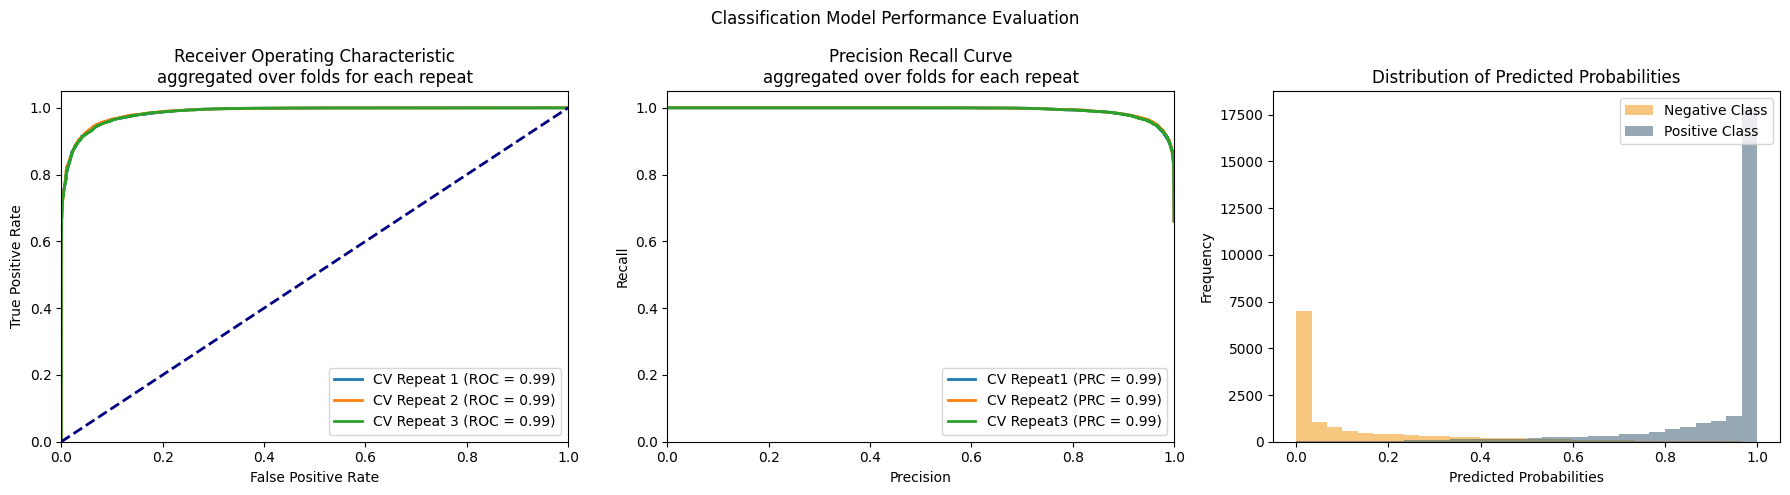

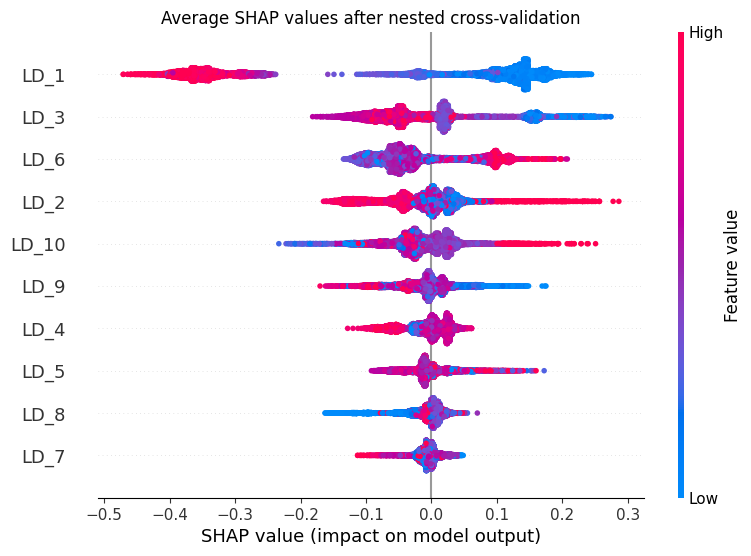

In [35]:
target = "outcome"
num_CV_repeats=3
num_outer_splits=5
num_inner_splits=3

harmonized_PCs.columns = list(range(10))
X, y = preprocess(harmonized_PCs, meta_data, sub_samp=False, bal_col=[], subset_percentage=0 , target=target, covariates=[], interaction_covs=[])
# run CellPhenoX
# create CellPhenoX object 
cellpx_obj = pyCellPhenoX_v1.CellPhenoX(X, y, CV_repeats=num_CV_repeats, outer_num_splits=num_outer_splits, inner_num_splits=num_inner_splits)
# and then train the classification model
cellpx_obj.model_training_shap_val(fast= True, outpath = "/projects/jyoung1@xsede.org/Research/xcell/results/revisions/tnbc")
shap_df = cellpx_obj.shap_df
#shap_df.head()
shap_df = shap_df.set_index(meta_data.index)
results_df = pd.concat([shap_df, meta_data], axis=1)
results_df.head()

<Axes: xlabel='outcome', ylabel='interpretable_score'>

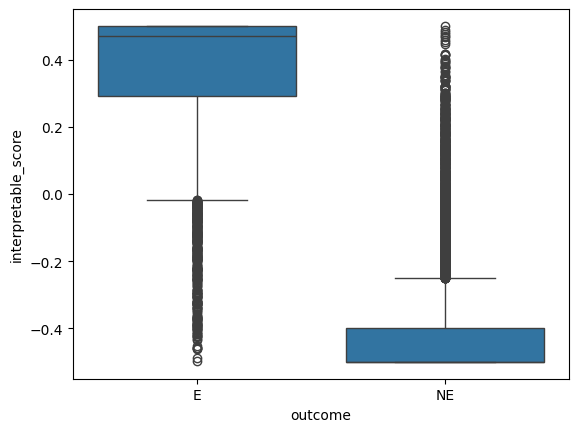

In [38]:
import seaborn as sns
sns.boxplot(data=results_df, x="outcome", y="interpretable_score")